# Clone and use YOLOv4 to detect directly
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14309, done.
remote: Total 14309 (delta 0), reused 0 (delta 0), pack-reused 14309
Receiving objects: 100% (14309/14309), 12.85 MiB | 11.86 MiB/s, done.
Resolving deltas: 100% (9766/9766), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

In [ ]:
# Download pre-trained YOLOv4 weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

Darknet is now built and ready to run detections using YOLOv4 in the cloud! You can find out which sorts of classes the pre-trained YOLOv4 weights can detect by clicking here. [COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command
```bash
!./darknet detector test <path to .data file> <path to config> <path to weights> <path to image>
```

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

In [ ]:
# show image using our helper function
imShow('predictions.jpg')

In [9]:
# This stops 'Run all' at this cell by causing an error
# assert False

# Coonect GoogleDrive to Colab

In [10]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [11]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 COCO		'Colab Notebooks'	 yolov3   yolov4_KTHFS
 Colab_dataset	'Robotics Fundamental'	 yolov4   yolov4_tiny


In [12]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


# Running YOLOv4 on Video in the Cloud!

Here is how to run detector on video stored in Google Drive and save video straight to Google drive as well!

**Note:** You will have to change the paths to where your video is stored within your Google Drive and to where you want the resulting video stored. I have a videos folder in the home directory of my Google Drive.

In [15]:
# !./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /mydrive/videos/test.mp4 -i 0 -out_filename /mydrive/videos/results.avi

# Train YOLOv4 Custom Object Detector!
we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)



### Step 1: Gathering and Labeling a Custom Dataset


### Step 2: Moving Your Custom Datasets Into Your Cloud VM

In [ ]:
assert False

In [ ]:
# this is where my datasets are stored within my Google Drive
!ls /mydrive/yolov4_KTHFS

In [18]:
# copy both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4_KTHFS/obj.zip ../    # training dataset
!cp /mydrive/yolov4_KTHFS/test.zip ../    # test dataset

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

### Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg, obj.data, obj.names, train.txt and test.txt files.

##### i) .cfg file
Copy over the yolov4.cfg to your Google Drive by running the cell below. This will allow us to edit it in a text editor.

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov4-custom.cfg /mydrive/yolov4_KTHFS/yolov4-obj.cfg

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov4-obj.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.

**(Image from previous tutorial so don't mind different file name)**

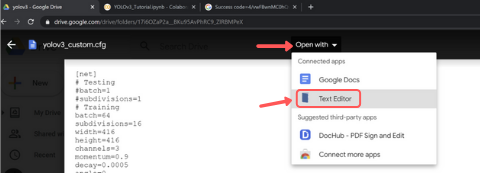

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** 
I set my **max_batches = 6000**, **steps = 4800, 5400**, I changed the **classes = 1** in the three YOLO layers and **filters = 18** in the three convolutional layers before the YOLO layers.

How to Configure Your Variables:

width = 416

height = 416
**(these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)**

max_batches = (# of classes) * 2000
**(but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)**

steps = (80% of max_batches), (90% of max_batches)
**(so if your max_batches = 10000, then steps = 8000, 9000)**

filters = (# of classes + 5) * 3
**(so if you are training for one class then your filters = 18, but if you are training for 4 classes then your filters = 27)**


**Optional:** If you run into memory issues or find the training taking a super long time. In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [21]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4_KTHFS/yolov4-obj.cfg ./cfg

##### ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** where you will have one class name per line in the same order as your classes.txt from the dataset generation step.

**NOTE:** You do not want to have spaces in your class name. For this reason I changed "Vehicle Registration Plate" to **license_plate**.

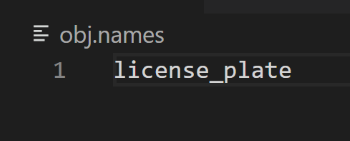


You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

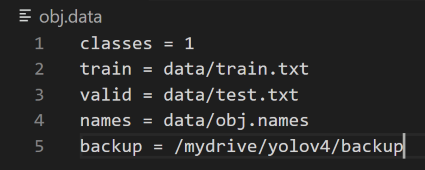

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

In [22]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4_KTHFS/obj.names ./data
!cp /mydrive/yolov4_KTHFS/obj.data  ./data

##### iii) Generating train.txt and test.txt
train.txt and test.txt files hold the image paths to all our training images and valdidation images.

Luckily I have created scripts that eaily generate these two files withe proper paths to all images.

The scripts can be accessed from the [Github Repo](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)

In [23]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4_KTHFS/generate_train.py ./
!cp /mydrive/yolov4_KTHFS/generate_test.py ./

Now simply run both scripts to do the work for you of generating the two txt files.

In [24]:
!python generate_train.py

In [25]:
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

If you are uncertain whether generating the files worked and want to double check that everything went as planned, double click on **train.txt** on the left side File Explorer and it should look like this.

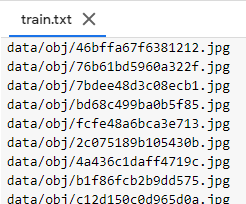

It will contain one line for each training image path.

### Step 4: Download pre-trained weights

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### Step 5: Train Your Custom Object Detector!
So run the following command. (-dont_show flag stops chart from popping up since Colab Notebook can't open images on the spot, -map flag overlays mean average precision on chart to see how accuracy of your model is, only add map flag if you have a validation dataset)
```
!./darknet detector train <path to obj.data> <path to custom config> yolov4.conv.137 -dont_show -map
```

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

After training, you can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you should aim for a loss under 2.

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your partially trained model and weights! Every 100 iterations a weights file called **yolov4-obj_last.weights** is saved to **mydrive/yolov4/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_KTHFS/backup/yolov4-obj_last.weights -dont_show

### Step 6: Checking the Mean Average Precision (mAP) of Your Model
If you didn't run the training with the '-map- flag added then you can still find out the mAP of your model after training. Run the following command on any of the saved weights from the training to see the mAP value for that specific weight's file. I would suggest to run it on multiple of the saved weights to compare and find the weights with the highest mAP as that is the most accurate one!

**NOTE:** If you think your final weights file has overfitted then it is important to run these mAP commands to see if one of the previously saved weights is a more accurate model for your classes.

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_KTHFS/backup/yolov4-obj_last.weights

### Step 7: Run Your Custom Object Detector!!!
You have done it! You now have a custom object detector to make your very own detections. Time to test it out and have some fun!

In [29]:
# set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
# run your trained model to detect image
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/kite.jpg -thresh 0.3

In [ ]:
imShow('predictions.jpg')
download('predictions.jpg')

In [ ]:
# run your trained model to detect video
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show /mydrive/yolov4_KTHFS/traffic_cone.mp4 -i 0 -out_filename /mydrive/yolov4_KTHFS/results.avi